# 🩺 Diabetes Prediction using K-Nearest Neighbors (KNN)

## 📌 Project Overview

In this project, we aim to build a predictive model using the **K-Nearest Neighbors (KNN)** algorithm to determine whether an individual is likely to have diabetes based on several medical attributes.

## 📊 Dataset Description

We are using the **Pima Indians Diabetes Dataset**, which is a well-known dataset in the medical and machine learning communities. It contains diagnostic measurements of female patients of Pima Indian heritage. The dataset includes the following features:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration after a 2-hour oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: A function which scores likelihood of diabetes based on family history
- **Age**: Age (years)
- **Outcome**: 1 if the person has diabetes, 0 otherwise (Target variable)

## 🎯 Objective

The goal is to train a KNN classifier to predict the `Outcome` variable (i.e., whether a person has diabetes) based on the input features. We will also evaluate the performance of the model using appropriate metrics and visualize the results.


## 📚 Importing Essential Libraries

To get started with our data analysis and visualization, we first import the essential Python libraries:

- **Numpy**: for efficient numerical computations and handling arrays.
- **pandas**: for loading, manipulating, and analyzing structured data.
- **Matplotlib**: for creating static visualizations to better understand our data.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 📥 Loading the Dataset

Now let's load the dataset using `pandas`. The dataset is in CSV format and will be read into a DataFrame for further analysis. After loading, we display the first few rows using the `.head()` method to get an initial look at the structure and contents of the data.


In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 🔍 Checking for Missing Values

Before moving forward with preprocessing and modeling, it is crucial to check for any **missing values** in the dataset. Missing data can negatively affect model performance and should be handled appropriately.

We use the `isnull().sum()` method to count the number of missing (NaN) values in each column.

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 🎯 Splitting Features and Target Variable

To prepare our data for training, we need to separate the **input features** (`X`) from the **target variable** (`y`).

- `X` contains all the independent variables (features) used to predict the outcome.
- `y` is the dependent variable that we aim to predict — in this case, whether the individual has diabetes.

We use `pandas`' `iloc` method to perform this split.

In [6]:
x = df.iloc[:, :8].values
y = df.iloc[:, -1].values

## ✂️ Splitting the Dataset into Training and Test Sets

To evaluate the model's performance on unseen data, we divide our dataset into two parts:

- **Training set**: Used to train the machine learning model.
- **Test set**: Used to evaluate the model's performance on data it hasn't seen before.

We use the `train_test_split()` function from Scikit-learn to perform this operation. We'll allocate 80% of the data for training and 20% for testing.


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## 📏 Feature Scaling with StandardScaler

Since the K-Nearest Neighbors (KNN) algorithm relies on calculating distances between data points, it is **crucial to normalize the features** to ensure all variables contribute equally to the model.

We use the `StandardScaler` from Scikit-learn to scale the features such that they have:

- **Mean = 0**
- **Standard deviation = 1**

This transformation helps avoid bias toward features with larger numeric ranges.


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 🤖 Building and Training the K-Nearest Neighbors (KNN) Model

Now that our data is preprocessed and scaled, we can proceed to train a **K-Nearest Neighbors (KNN)** classifier. KNN is a simple and effective classification algorithm that assigns the class of a new sample based on the **majority vote of its 'k' nearest neighbors** in the feature space.

In this implementation:

- We use **k = 3** neighbors.
- We use **Euclidean distance** by setting `p = 2` in the Minkowski metric.



In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)



```markdown
## 📊 Model Evaluation – Classification Metrics

To assess the performance of our KNN classifier, we use several key evaluation metrics from Scikit-learn:

- **Accuracy**: Overall percentage of correct predictions.
- **Precision**: Correct positive predictions out of all predicted positives.
- **Recall (Sensitivity)**: Correct positive predictions out of all actual positives.
- **F1 Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: A table showing correct and incorrect classifications.



In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_prediction = model.predict(x_test_scaled)

confusion = confusion_matrix(y_test,y_prediction)
classification = classification_report(y_test,y_prediction)
accuracy = accuracy_score(y_test,y_prediction)

print(' accuracy score is ', accuracy)
print('classification report is ', classification)
print('confusion matrix is: \n ', confusion)

 accuracy score is  0.7077922077922078
classification report is                precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

confusion matrix is: 
  [[81 18]
 [27 28]]


## 📊 Visualizing the Confusion Matrix

To evaluate how well our KNN model performs in classifying the samples, we use a **Confusion Matrix**.  
This matrix gives us detailed insights into the **true positives**, **false positives**, **true negatives**, and **false negatives**.

We'll visualize it using a heatmap for better clarity.



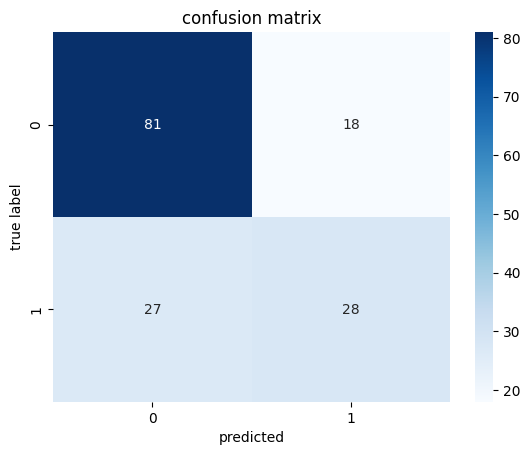

In [28]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()

## ✅ Conclusion & Future Work

- We trained a KNN model to classify diabetes outcomes based on medical features.
- The achieved accuracy was around **~70%**, which shows decent but improvable performance.
- Precision and Recall metrics indicate the model needs improvement, especially in identifying the minority class.

### 🔮 Future Improvements:
- Try other classification algorithms (e.g., Random Forest, XGBoost).
- Apply feature selection or dimensionality reduction (e.g., PCA).
- Tune hyperparameters with GridSearchCV.
- Handle potential class imbalance with techniques like SMOTE.
